In [1]:
import sys
import os
sys.path.append(os.path.abspath("../")) #Add parent directory

In [2]:
# import torch
# import nibabel as nib
# import os
# import numpy as np

## Load data

In [3]:
from Modular_DL.data_loading import load_nifti, resample_image
from Modular_DL.data_normalization import z_score_normalize
import SimpleITK as sitk

In [ ]:
folder_path = r"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\TrainingValidationTestSets\Training_Set".replace("\\", "/")

for root, _, files in os.walk(folder_path):
    for file in files:
        #print(file)
        if file.endswith(".nii") or file.endswith(".nii.gz"):
            file_path = os.path.join(root, file).replace("\\", "/")

            data, affine, voxel_spacing = load_nifti(file_path)
            print(type(voxel_spacing))

            data = z_score_normalize(data)

            #Resampling data
            image_sitk = sitk.GetImageFromArray(data)
            image_sitk.SetSpacing(voxel_spacing)

            #target spacing for now: 1,1,1
            target_spacing = (1.0, 1.0, 1.0)

            #Resample the image
            resampled_image = resample_image(image_sitk, target_spacing)

            #convert back to numpy array
            resampled_data = sitk.GetArrayFromImage(resampled_image)

            print("Resampled", resampled_data.shape)


            # print(f"------------------Start {file}--------------------")
            # print(f"File: {file} - Voxel Spacing: {voxel_spacing}")
            # print("\n")
            # print(f"File: {file} - Affine matrix: \n{affine}")
        
            # print(f"------------------End {file}--------------------")
            # print("\n")
            


<class 'tuple'>


AttributeError: 'tuple' object has no attribute 'GetPixelIDValue'

## Coordinate system

In [4]:
import pyvista as pv

In [5]:
def visualize_3d(image_data, voxel_spacing=(0.9375, 1.5, 0.9375)):
    """
    Visualize 3D volumetric data using pyvista.

    Parameters:
    - image_data: 3D NumPy array containing the volumetric data.
    - voxel_spacing: Tuple of (dx, dy, dz) voxel spacing.
    """
    # Get the dimensions of the image data
    dims = image_data.shape
    
    # Define the grid
    grid = pv.ImageData()
    
    # Set the grid dimensions
    grid.dimensions = dims[:-1]  # No need to add +1 here
    
    # Set the spacing (cell sizes)
    grid.spacing = voxel_spacing
    
    # Set the origin (default is (0, 0, 0))
    grid.origin = (0, 0, 0)
    
    # Flatten the image data and assign it to the grid
    grid.point_data["values"] = image_data[:-1].flatten(order="F")
    
    # Plot using volume rendering
    opacity = [0, 0, 0.1, 0.3, 0.6, 0.9, 1.0]  # Adjust opacity transfer function
    grid.plot(volume=True, opacity=opacity)
    
# Assuming sample_image is your 3D NumPy array
sample_folder = r"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\TrainingValidationTestSets\Training_Set\IBSR_01\IBSR_01.nii.gz".replace("\\", "/")
sample_image = nib.load(sample_folder).get_fdata(dtype=np.float32)
print(sample_image.shape)
visualize_3d(sample_image)

(256, 128, 256, 1)


ValueError: data length of (8355840) != required length (8388608)

In [ ]:
#reduced_array = np.squeeze(sample_image, axis = -1)
sample_folder = r"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\TrainingValidationTestSets\Training_Set\IBSR_01\IBSR_01.nii.gz".replace("\\", "/")
sample_image = nib.load(sample_folder).get_fdata(dtype=np.float32)
reduced_array = sample_image[...,0]
reduced_array.shape

grid = pv.ImageData()

grid.dimensions = np.array(reduced_array.shape)
grid.spacing = (0.9375, 1.5, 0.9375)
grid.point_data["values"] = reduced_array.flatten(order = "F")

opacity = [0, 0.1, 0.3, 0.6, 0.9, 1.0]

grid.plot(volume=True, opacity=opacity, cmap="viridis")

ImportError: Please install `trame` and `ipywidgets` to use this feature.

In [13]:
import trame
import ipywidgets

print("Trame and ipywidgets are installed and working correctly!")

Trame and ipywidgets are installed and working correctly!


In [ ]:
a = sample_image.shape
a[:-1]

(256, 128, 256)

(20, 5, 10)


c:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\New_code\venv\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


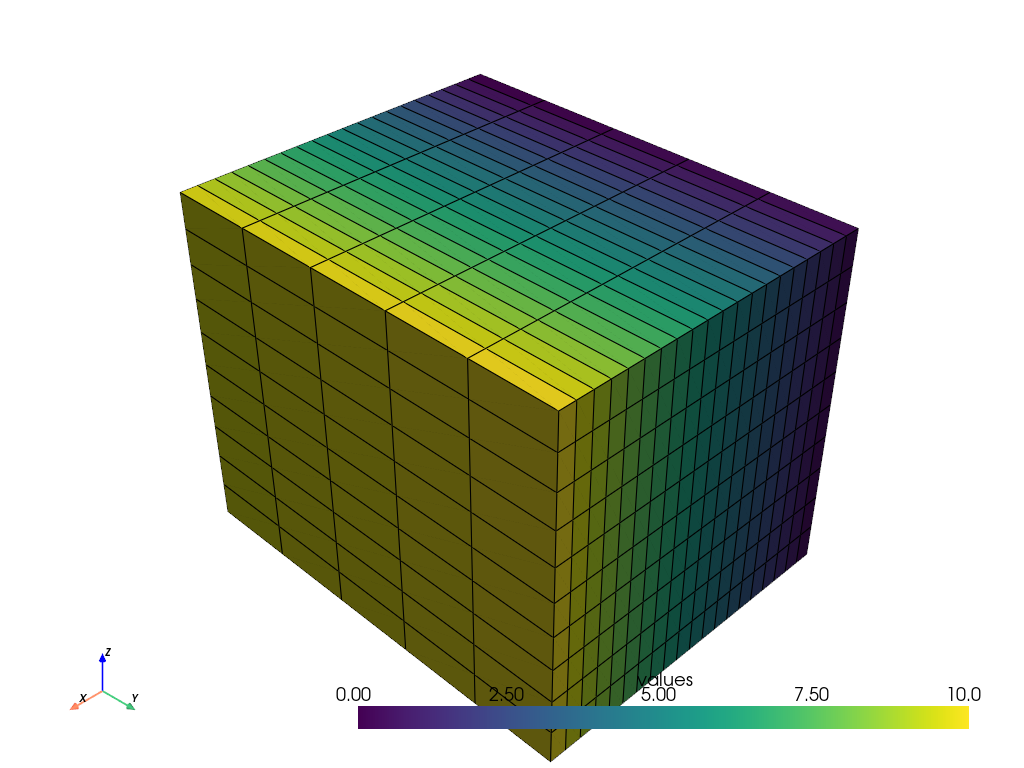

In [ ]:
values = np.linspace(0, 10, 1000).reshape((20, 5, 10))
values.shape

# Create the spatial reference
grid = pv.ImageData()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
print(values.shape)
grid.dimensions = np.array(values.shape) + 1

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 5, 2)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = values.flatten(order="F")  # Flatten the array

# Now plot the grid
grid.plot(show_edges=True)

In [ ]:
pv.UniformGrid()

AttributeError: module 'pyvista' has no attribute 'UniformGrid'